<a href="https://colab.research.google.com/github/evsemenova/Python-for-Analysts/blob/HW_4/%D0%A3%D1%80%D0%BE%D0%BA_4_%D0%9F%D1%80%D0%B5%D0%B4%D0%B2%D0%B0%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Matplotlib_%D0%B8_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality**

In [19]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

In [20]:
# Загрузим файлы
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
# Просмотрим первые 5 строк
df1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**2. На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.**

In [21]:
df['good'] = df['quality'].apply(lambda x: 'yes' if x > 5 else 'no')
# Посмотрим
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,yes
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,yes
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,yes
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,yes
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,yes


**3. Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока.**

In [23]:
# Просмотрим стили оформления
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [66]:
# Выберим понравившийся
plt.style.use('tableau-colorblind10')

In [79]:
# Выявим влияние кислотности на вкус
# Подготовим таблицу
data1 = df.groupby('quality')['fixed acidity'].agg(fixed_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data1.head(10)

,quality,fixed_acidity
6,9,7.420000
5,8,6.657143
4,7,6.734716
3,6,6.837671
2,5,6.933974
1,4,7.129448
0,3,7.600000


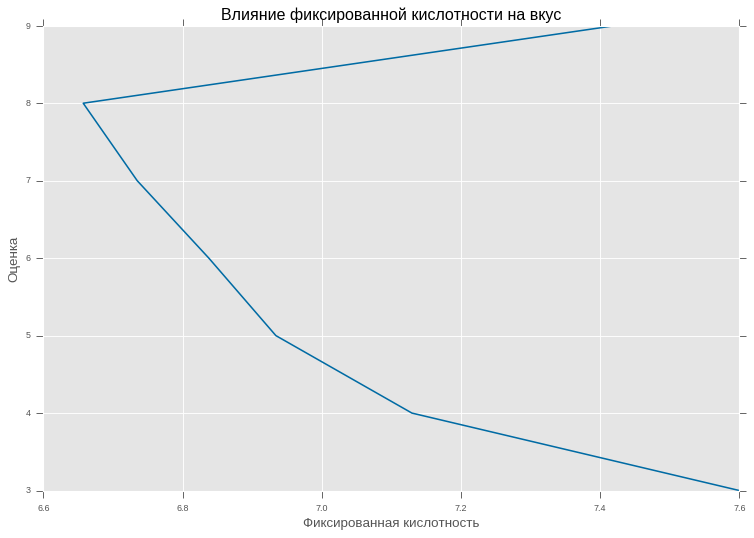

In [80]:
# Создаем линейный график
plt.figure(figsize = (10,7))

plt.plot(data1['fixed_acidity'], data1['quality'])

plt.title('Влияние фиксированной кислотности на вкус')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Оценка')

plt.show()

Вкус улучшается со снижением фиксированной кислотности


---



In [81]:
# Выделим долю вина, оцененого как хорошее:
data = df['good'].value_counts()
data.head()

yes    3258
no     1640
Name: good, dtype: int64

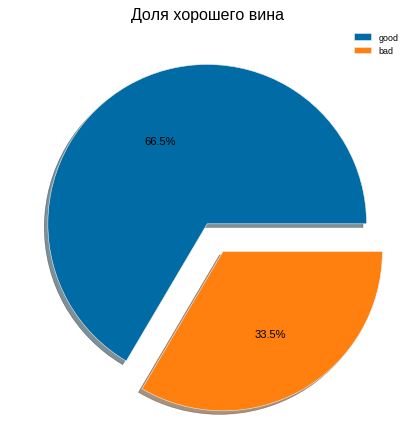

In [82]:
plt.figure(figsize = (8,6))

plt.pie(data, autopct='%1.1f%%', shadow = 0.2, explode = [0, 0.2])

plt.title('Доля хорошего вина')
plt.legend(['good', 'bad'])

plt.show()
# На данной диаграмме мы видим, что доля хорошего вина (с оценкой > 5) чуть выше, что в целом нам даёт 
# хорошее качество выборки без перекоса в сторону плохого или хорошего.